In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf #https://anaconda.org/anaconda/statsmodels
import statsmodels.api as sm #https://scikit-posthocs.readthedocs.io/en/latest/installation/
import scikit_posthocs as sp
import seaborn as sns

In [2]:
mobsuiteSUM = pd.read_csv("02072023_EcoliARETE_Plasmids_Isolates_All_no_novel_mobsuite_results_SUMS_all_stats.csv")

In [3]:
mobsuiteSUM.head()

,Genome,Source,Outbreak,Phylogroup,Total_Plasmids
0,EC_7360_2H2_D,Diseased,F7360,B1,10
1,EC_0731_2H1_D,Diseased,F0731,G,9
2,EC_0731_2S2_D,Diseased,F0731,G,9
3,EC_23315_H1_D,Diseased,F23315,G,9
4,EC_23315_S2_D,Diseased,F23315,G,9


In [4]:
mobsuiteSUM['Source'] = mobsuiteSUM['Source'].replace({'Cecal' : 'Healthy'}, regex=True)

In [5]:
#mobsuiteSUM["source"]=mobsuiteSUM['row_0'].str.split('_').str[-1]

In [6]:
mobsuiteSUM.head()

,Genome,Source,Outbreak,Phylogroup,Total_Plasmids
0,EC_7360_2H2_D,Diseased,F7360,B1,10
1,EC_0731_2H1_D,Diseased,F0731,G,9
2,EC_0731_2S2_D,Diseased,F0731,G,9
3,EC_23315_H1_D,Diseased,F23315,G,9
4,EC_23315_S2_D,Diseased,F23315,G,9


In [7]:
#mobsuiteSUM['source'] = mobsuiteSUM['source'].replace({'D':'Diseased', 'H':'Cecal', 'E':'Environmental'})

In [8]:
#mobsuite2 = mobsuiteSUM.drop(mobsuiteSUM.index[len(mobsuiteSUM)-1])

In [9]:
import itertools as it
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt
import seaborn as sns


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Healthy: t-test independent samples, P_val:1.081e-01 t=1.617e+00
Healthy vs. Environmental: t-test independent samples, P_val:6.188e-01 t=4.986e-01
Diseased vs. Environmental: t-test independent samples, P_val:2.592e-02 t=2.246e+00


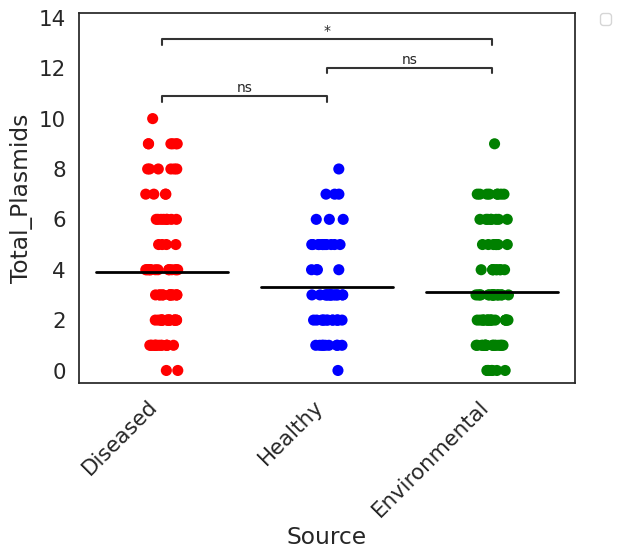

In [12]:

pairs = []

pairs2=[('Diseased', 'Healthy'), ('Diseased','Environmental'), ("Healthy","Environmental")]
states_subcat =['Diseased', 'Healthy', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': mobsuiteSUM, 'x': 'Source', 'y': 'Total_Plasmids', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Total_Plasmids", data=mobsuiteSUM, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Total_Plasmids",
            data=mobsuiteSUM,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("04122023_EcoliARETE_sumofplasmidvssource_healthy.png", dpi = 400, bbox_inches= "tight")


,row_0,All,source
0,EC_0012_1H1_D,2,Diseased
1,EC_0012_2H1_D,6,Diseased
2,EC_0012_2L1_D,1,Diseased
3,EC_0012_3S1_D,6,Diseased
4,EC_0012_C1_H,3,Cecal
...,...,...,...
240,EC_E4DI_1_E,0,Environmental
241,EC_E4P_1_E,0,Environmental
242,EC_E9FP_1_E,0,Environmental
243,EC_E2DI_2_E,0,Environmental


In [13]:
AMRSUM = pd.read_csv("02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab.csv")
AMRSUMall = pd.read_csv("02092023_EcoliARETE_RGI_strictperfectfiltered_crosstab_ALLSUMS_stats.csv")

In [14]:
AMRSUM1 = AMRSUM[AMRSUM.columns.drop(list(AMRSUM.filter(regex='Myco')))]

In [18]:
AMRSUM1

,row_0,AAC(3)-IId,AAC(3)-IV,AAC(3)-VIa,AAC(6')-Iid,ANT(3'')-IIa,ANT(3'')-Ib,ANT(4')-IIb,APH(3'')-Ib,APH(3')-IIa,...,sul1,sul2,tet(A),tet(B),tet(C),tet(H),tet(J),tetR,ugd,All
0,EC_0012_1H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55
1,EC_0012_2H1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,56
2,EC_0012_2L1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,53
3,EC_0012_3S1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55
4,EC_0012_C1_H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,EC_E9DN_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,53
242,EC_E9DN_2_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,55
243,EC_E9FP_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,56
244,EC_E9L_1_E,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1,58


In [19]:
AMRSUM2 = AMRSUM1[['All']].copy()

In [20]:
result = pd.concat([AMRSUMall, AMRSUM2], axis=1)

In [21]:
AMRcor = result.drop('Total_AMR', axis = 1)

In [22]:
AMRcorrect = AMRcor.rename(columns={'All': 'Total_AMR'})

In [27]:
AMRcorrect['Source'] = AMRcorrect['Source'].replace({'Cecal' : 'Healthy'}, regex=True)

In [28]:
AMRcorrect.to_csv('04122023_EcoliARETE_RGI_strictperfectfiltered_crosstab_ALLSUMS_stats_nomyco_healthy.csv')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Healthy: t-test independent samples, P_val:4.492e-02 t=2.022e+00
Healthy vs. Environmental: t-test independent samples, P_val:1.416e-02 t=-2.482e+00
Diseased vs. Environmental: t-test independent samples, P_val:1.941e-01 t=-1.303e+00


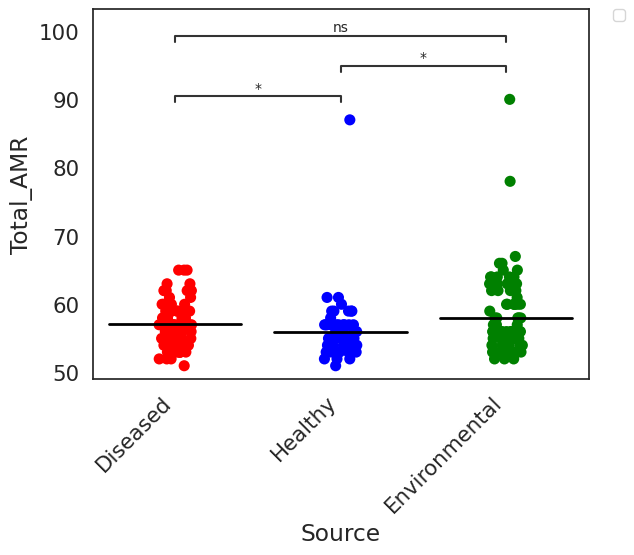

In [30]:
pairs = []

pairs2=[('Diseased', 'Healthy'), ('Diseased','Environmental'), ("Healthy","Environmental")]
states_subcat =['Diseased', 'Healthy', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': AMRcorrect, 'x': 'Source', 'y': 'Total_AMR', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Total_AMR", data=AMRcorrect, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Total_AMR",
            data=AMRcorrect,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("04122023_EcoliARETE_sumofAMRvssource_nomyco_healthy.png", dpi = 400, bbox_inches= "tight")


In [32]:
VFSUM = pd.read_csv("02072023_EcoliARETE_VFDB_filtered80_crosstab_ALLSUMS_stats.csv")

In [34]:
VFSUM['Source'] = VFSUM['Source'].replace({'Cecal' : 'Healthy'}, regex=True)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Healthy: t-test independent samples, P_val:1.770e-01 t=1.357e+00
Healthy vs. Environmental: t-test independent samples, P_val:2.012e-01 t=1.284e+00
Diseased vs. Environmental: t-test independent samples, P_val:8.028e-03 t=2.680e+00


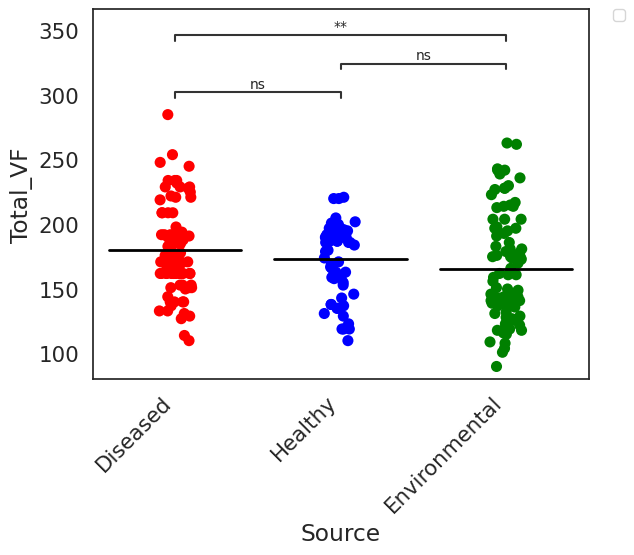

In [35]:
pairs = []

pairs2=[('Diseased', 'Healthy'), ('Diseased','Environmental'), ("Healthy","Environmental")]
states_subcat =['Diseased', 'Healthy', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': VFSUM, 'x': 'Source', 'y': 'Total_VF', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Total_VF", data=VFSUM, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Total_VF",
            data=VFSUM,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("04122023_EcoliARETE_sumofVFvssource_healthy.png", dpi = 400, bbox_inches= "tight")

In [37]:
BACMETSUM = pd.read_csv("02072023_EcoliARETE_BACMET_filtered80_crosstab_ALLSUMS_stats.csv")

In [38]:
BACMETSUM['Source'] = BACMETSUM['Source'].replace({'Cecal' : 'Healthy'}, regex=True)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Diseased vs. Healthy: t-test independent samples, P_val:4.870e-01 t=-6.968e-01
Healthy vs. Environmental: t-test independent samples, P_val:5.875e-01 t=-5.437e-01
Diseased vs. Environmental: t-test independent samples, P_val:2.178e-01 t=-1.237e+00


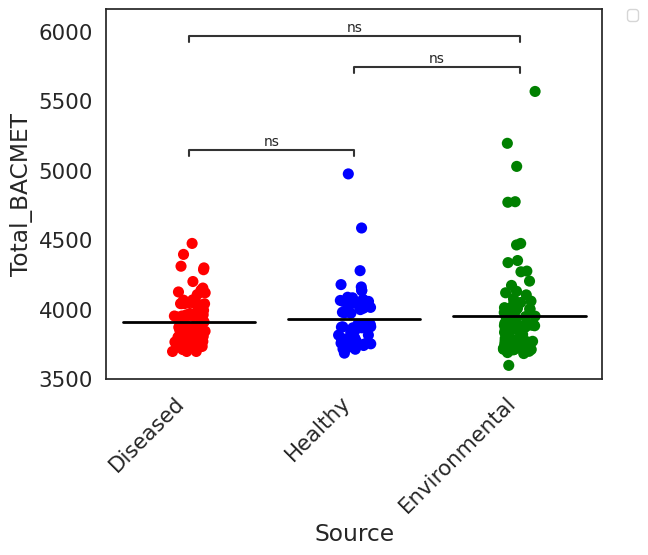

In [39]:
pairs = []

pairs2=[('Diseased', 'Healthy'), ('Diseased','Environmental'), ("Healthy","Environmental")]
states_subcat =['Diseased', 'Healthy', 'Environmental']
sns.set_style(style='white') 
state_palette = "colorblind"

with sns.plotting_context('notebook', font_scale = 1.4): 
    #Create new plot 
    hue_plot_params = {'data': BACMETSUM, 'x': 'Source', 'y': 'Total_BACMET', "order": states_subcat, "palette": state_palette}
    ax = sns.stripplot(x="Source", y="Total_BACMET", data=BACMETSUM, size=8, order=states_subcat, palette=['red','blue', 'green'])
plt.xticks(rotation=45, ha="right")


# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x= "Source",
            y="Total_BACMET",
            data=BACMETSUM,
            showfliers=False,
            showbox=False,
            showcaps=False,
            order=states_subcat,
            ax=ax)

handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#annotating with pairs
annot = Annotator(ax, pairs2, **hue_plot_params)
annot.configure(test='t-test_ind', verbose=2)
annot.apply_test()
annot.annotate()

plt.savefig("04122023_EcoliARETE_sumofBACMETvssource_Healthy.png", dpi = 400, bbox_inches= "tight")